In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [12,8]

### Logistic regression and regualarization

- Regularization combats overfitting by making the models coefficients smaller

- In sklearn the c and the degree of regularization are inverse, the lower the c, the higher the regularization.

- regularized loss = orginal loss + large coeffiecent penalty
    - more regularization: lower training accuracy
    - more regularization: (almost always) higher test accuracy

- If using a feature too heavily was causing overfitting, then regularization causes you to 'fit less' and thus overfit less. 

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#X_10 = data.data[:, :10]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(data.data)
y = data.target
y[y == 0] = -1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression()

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

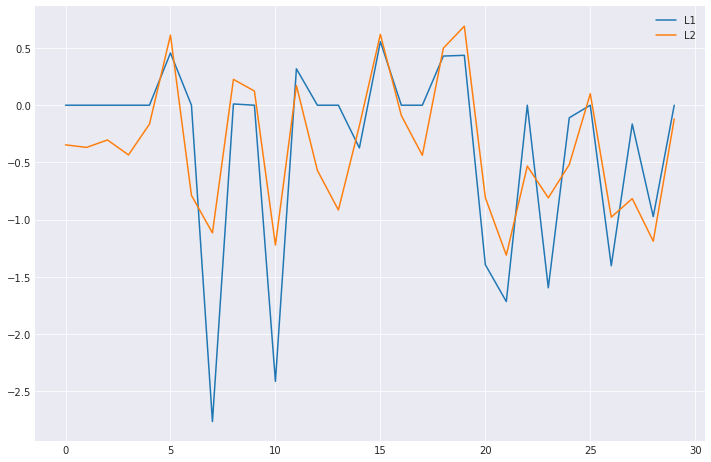

In [6]:
plt.plot(lr_L1.coef_.flatten(), label='L1')
plt.plot(lr_L2.coef_.flatten(), label='L2')
plt.legend()

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

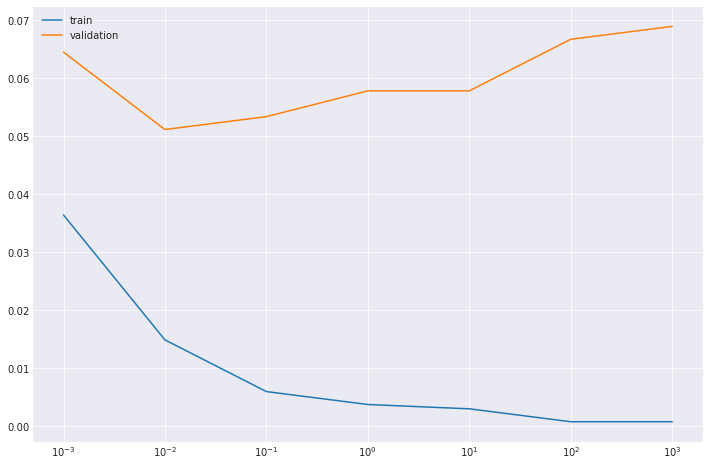

In [8]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value 
for C_value in C_values:
    #Create LogisticRegression object and fit 
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists 
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(('train', 'validation'))
plt.show()

In [9]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])


In [10]:
import dc_func as dc 

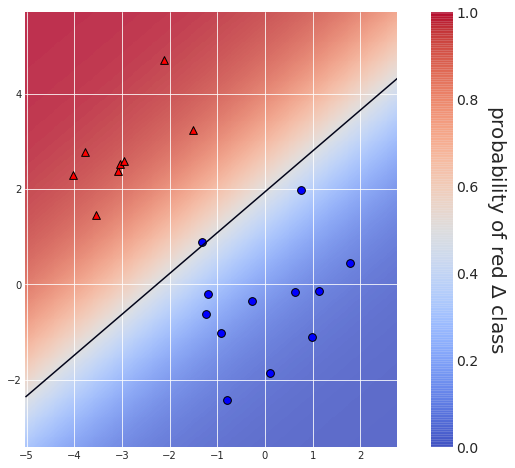

Maximum predicted probability 0.9761229967078282


In [12]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
dc.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

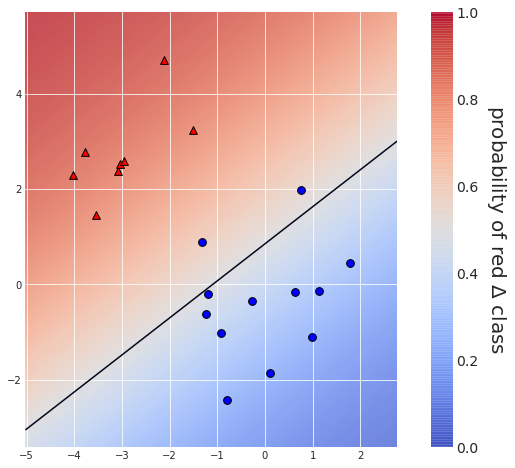

Maximum predicted probability 0.8990965658995651


In [13]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
dc.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

In [14]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin=0, vmax=16, 
              interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title('class label = %d' % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_proba = lr.predict_proba(X[i][None])[0,pred]
        plt.title('label=%d, prediction=%d, proba=%.2f' % (y[i], pred, pred_proba))
    plt.show()

In [15]:
X = digits.data
y = digits.target

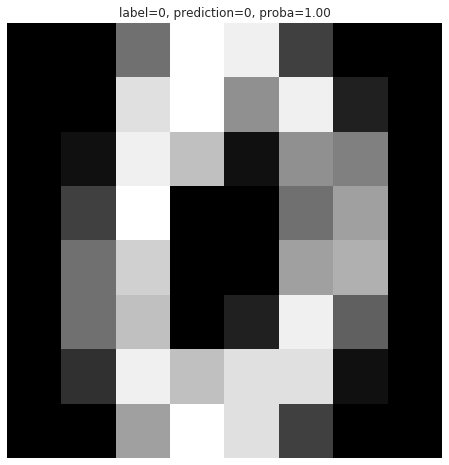

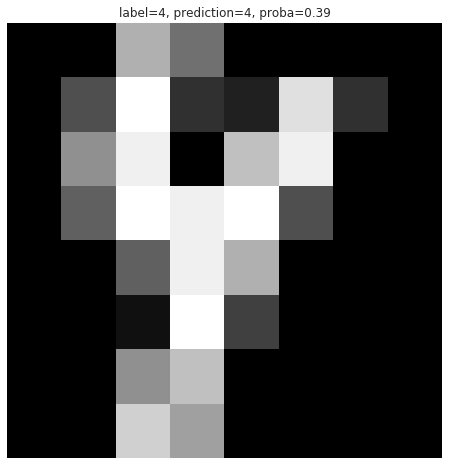

In [19]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximun probability
proba_inds = np.argsort(np.max(proba, axis=1))

# Show the most confident digit
show_digit(proba_inds[-1], lr)

# Show the least confident digit
show_digit(proba_inds[0], lr)

### Multi class logistic regression
